# 確認

In [8]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
display(x)
y=dataset.iloc[:, 101].astype(str)
display(y)
display(y.value_counts())

Al / Si  Na / Si  F / Si  H2O / Si  sda1 / Si  OH / Si  cryst_time  \
249    0.012500    0.529     0.0      20.4      0.356    0.356       110.0   
250    0.010000    0.529     0.0      20.4      0.356    0.356       110.0   
251    0.012500    0.529     0.0      20.4      0.297    0.297       110.0   
252    0.010000    0.529     0.0      20.4      0.297    0.297       110.0   
253    0.033333    0.529     0.0      20.4      0.237    0.237       110.0   
...         ...      ...     ...       ...        ...      ...         ...   
29950  0.039501    0.000     0.5       0.0      0.250    0.000       816.0   
29951  0.020408    0.000     0.5       0.0      0.250    0.000       168.0   
29952  0.020408    0.000     0.5       0.0      0.250    0.000       216.0   
29977  0.100110    0.000     0.5       0.0      0.250    0.000       168.0   
29978  0.100110    0.000     0.5       0.0      0.250    0.000       336.0   

       cryst_temp  MACCS_11  MACCS_19  ...  MACCS_155  MACCS_156  MACCS_158  \
249         140.0         0         0  ...          0          0          1   
250         140.0         0         0  ...          0          0          1   
251         140.0         0         0  ...          0          0          1   
252         140.0         0         0  ...          0          0          1   
253         140.0         0         0  ...          0          0          1   
...           ...       ...       ...  ...        ...        ...        ...   
29950       175.0         0         0  ...          1          0          1   
29951       175.0         0         0  ...          1          0          1   
29952       175.0         0         0  ...          1          0          1   
29977       175.0         0         0  ...          1          0          1   
29978       175.0         0         0  ...          1          0          1   

       MACCS_159  MACCS_160  MACCS_162  MACCS_163  MACCS_164  MACCS_165  \
249            0          1          0          1          0          1   
250            0          1          0          1          0          1   
251            0          1          0          1          0          1   
252            0          1          0          1          0          1   
253            0          1          0          1          0          1   
...          ...        ...        ...        ...        ...        ...   
29950          0          0          0          1          0          1   
29951          0          0          0          1          0          1   
29952          0          0          0          1          0          1   
29977          0          0          0          1          0          1   
29978          0          0          0          1          0          1   

       MACCS_166  
249            0  
250            0  
251            0  
252            0  
253            0  
...          ...  
29950          0  
29951          0  
29952          0  
29977          0  
29978          0  

[4697 rows x 93 columns]

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2754
True     1943
Name: count, dtype: int64

# mor

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2754
True     1943
Name: count, dtype: int64

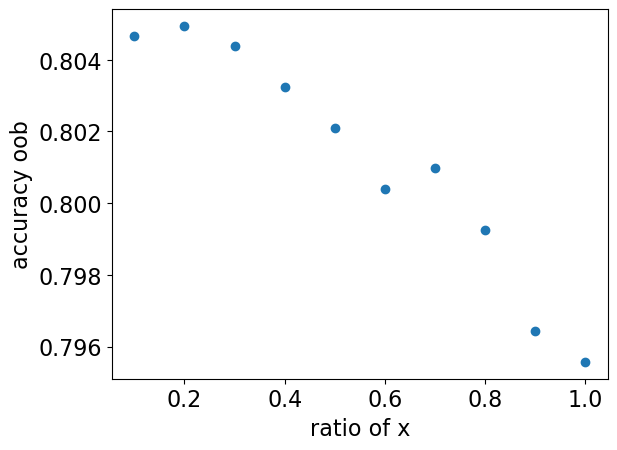

最適なx: 0.2


importance
Al / Si      0.128049
Na / Si      0.091960
F / Si       0.013043
H2O / Si     0.077259
sda1 / Si    0.084858
...               ...
MACCS_162    0.005139
MACCS_163    0.006648
MACCS_164    0.003849
MACCS_165    0.004712
MACCS_166    0.000747

[93 rows x 1 columns]

False  True
False   2032    33
True      38  1419

False  True
False    579   110
True     130   356

正解率(Accuracy) : 訓練 0.9798409994321409, 検証 0.7957446808510639
適合率(Precision) : 訓練 0.9772727272727273, 検証 0.7639484978540773
再現率(Recall) : 訓練 0.9739190116678106, 検証 0.7325102880658436
F1スコア : 訓練 0.9755929872808525, 検証 0.7478991596638656


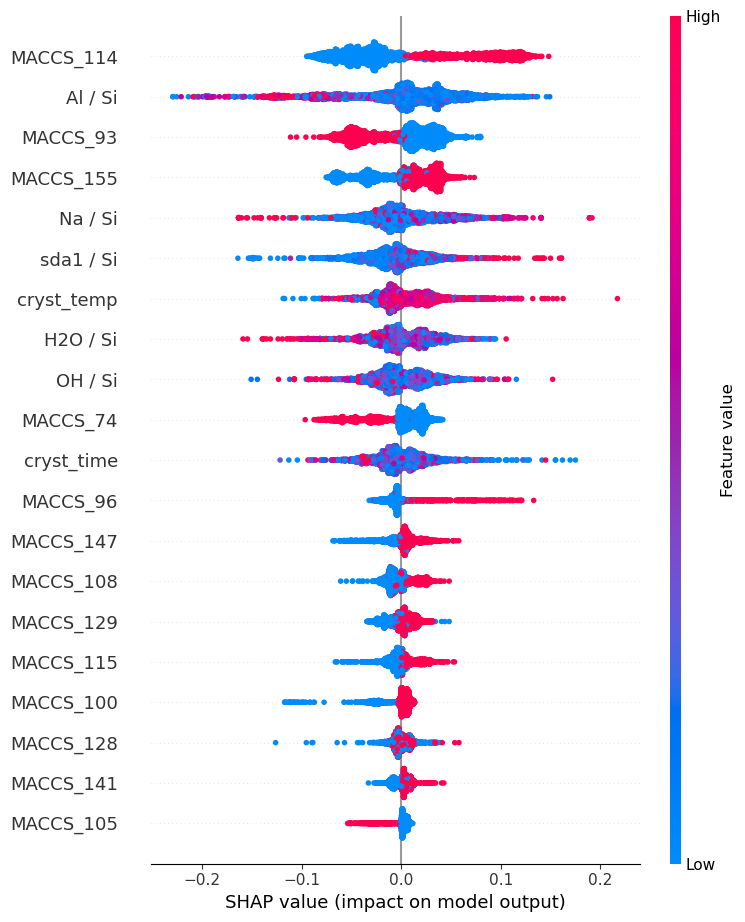

In [9]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 101].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# bea

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952     True
29977     True
29978     True
Name: bea, Length: 4697, dtype: object

bea
False    4232
True      465
Name: count, dtype: int64

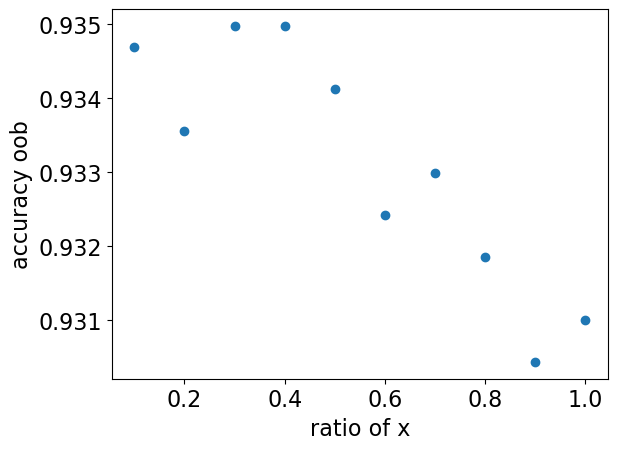

最適なx: 0.30000000000000004


importance
Al / Si      0.099163
Na / Si      0.069219
F / Si       0.016204
H2O / Si     0.136680
sda1 / Si    0.084880
...               ...
MACCS_162    0.026398
MACCS_163    0.005009
MACCS_164    0.000799
MACCS_165    0.002061
MACCS_166    0.000297

[93 rows x 1 columns]

False  True
False   3166     7
True       7   342

False  True
False   1017    42
True      56    60

正解率(Accuracy) : 訓練 0.9960249858035207, 検証 0.916595744680851
適合率(Precision) : 訓練 0.9799426934097422, 検証 0.5882352941176471
再現率(Recall) : 訓練 0.9799426934097422, 検証 0.5172413793103449
F1スコア : 訓練 0.9799426934097422, 検証 0.5504587155963303


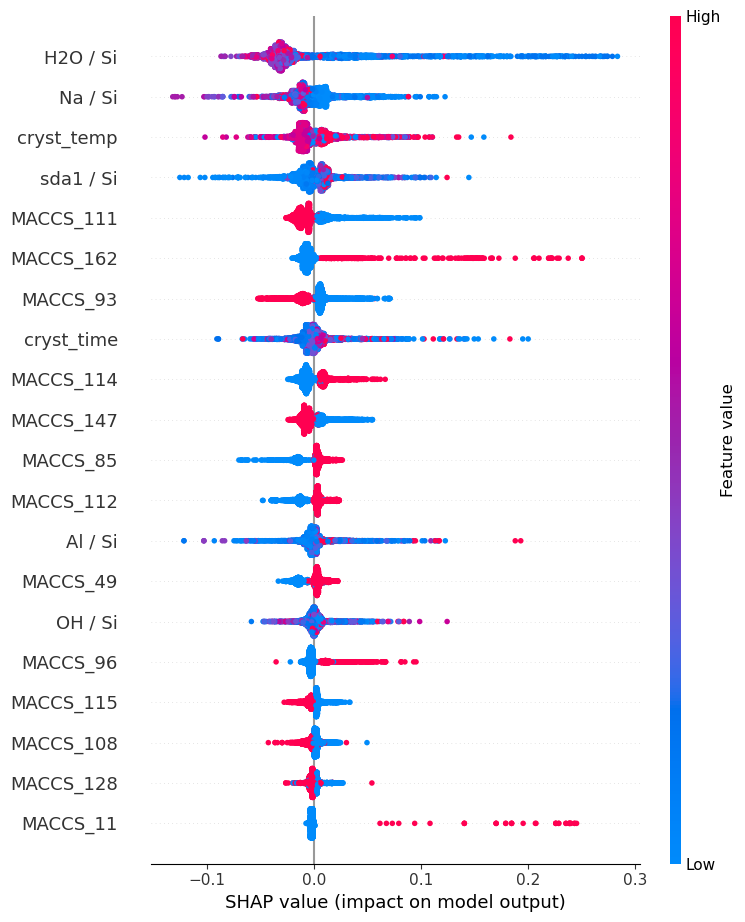

In [10]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 102].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtt

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: mtt, Length: 4697, dtype: object

mtt
False    4192
True      505
Name: count, dtype: int64

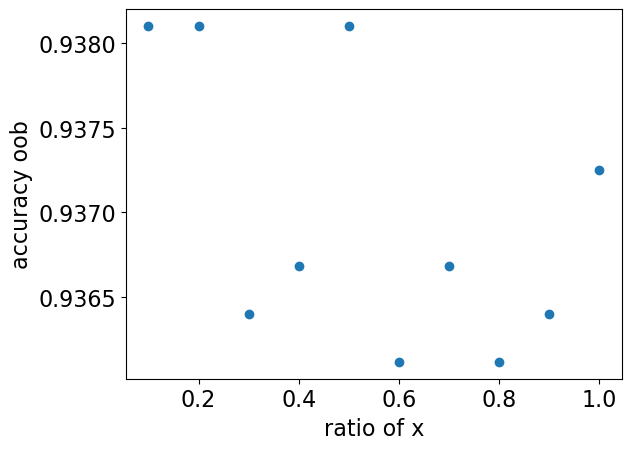

最適なx: 0.1


importance
Al / Si      0.107910
Na / Si      0.090884
F / Si       0.009571
H2O / Si     0.089612
sda1 / Si    0.084169
...               ...
MACCS_162    0.001658
MACCS_163    0.009421
MACCS_164    0.002672
MACCS_165    0.015092
MACCS_166    0.000544

[93 rows x 1 columns]

False  True
False   3134     9
True      22   357

False  True
False   1017    32
True      43    83

正解率(Accuracy) : 訓練 0.9911981828506531, 検証 0.9361702127659575
適合率(Precision) : 訓練 0.9754098360655737, 検証 0.7217391304347827
再現率(Recall) : 訓練 0.941952506596306, 検証 0.6587301587301587
F1スコア : 訓練 0.9583892617449664, 検証 0.6887966804979253


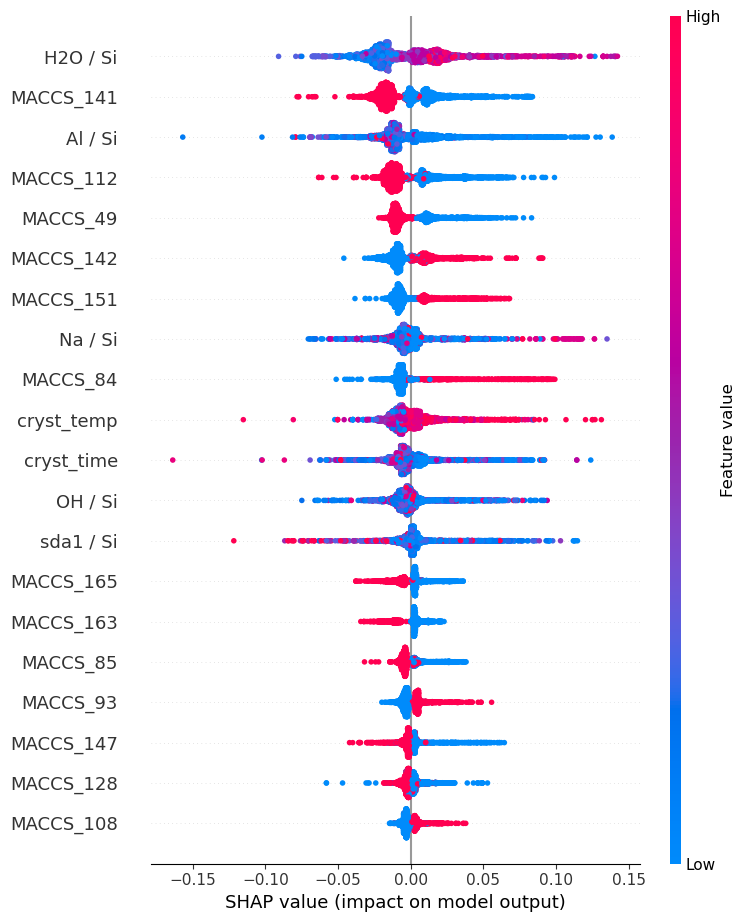

In [11]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 103].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# cas

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: cas, Length: 4697, dtype: object

cas
False    3357
True     1340
Name: count, dtype: int64

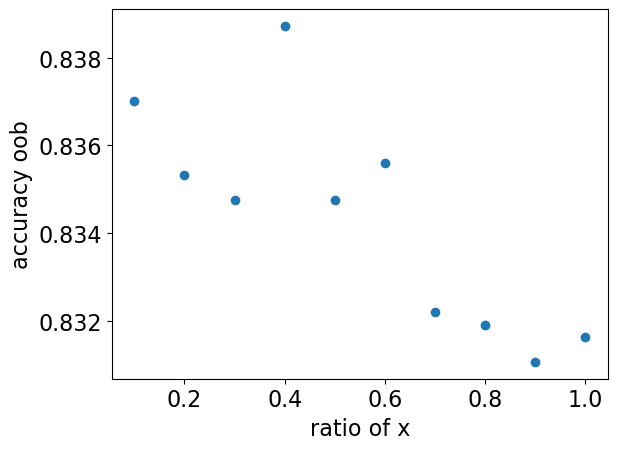

最適なx: 0.4


importance
Al / Si      0.172022
Na / Si      0.094068
F / Si       0.009789
H2O / Si     0.073306
sda1 / Si    0.074354
...               ...
MACCS_162    0.003686
MACCS_163    0.005091
MACCS_164    0.001588
MACCS_165    0.006980
MACCS_166    0.001535

[93 rows x 1 columns]

False  True
False   2486    31
True      37   968

False  True
False    749    91
True     116   219

正解率(Accuracy) : 訓練 0.9806927881885292, 検証 0.8238297872340425
適合率(Precision) : 訓練 0.968968968968969, 検証 0.7064516129032258
再現率(Recall) : 訓練 0.96318407960199, 検証 0.6537313432835821
F1スコア : 訓練 0.9660678642714571, 検証 0.6790697674418604


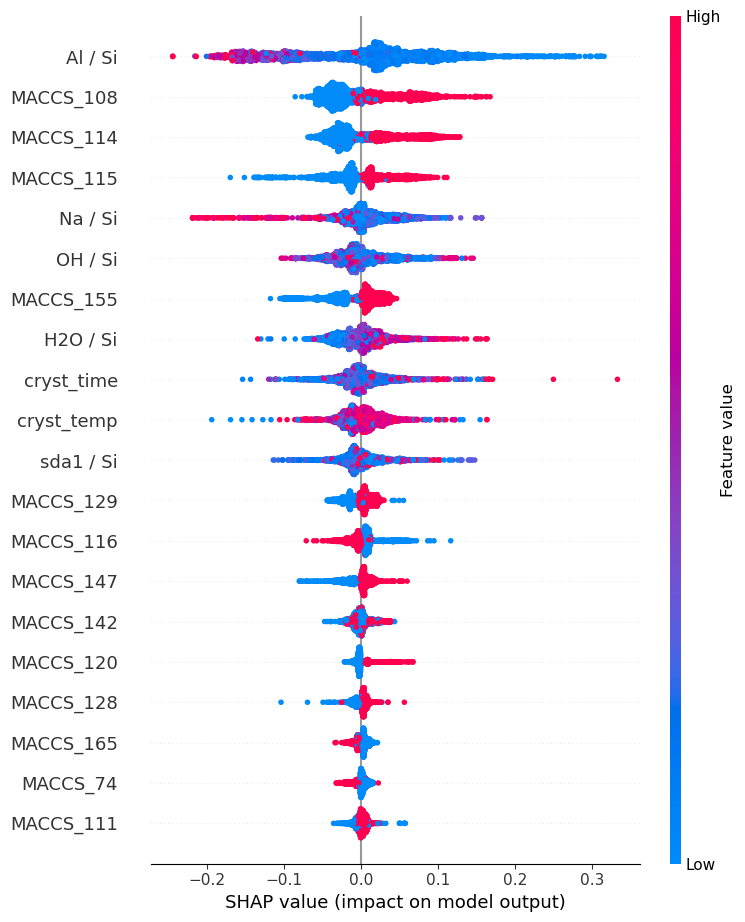

In [12]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 104].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d6r

249      False
250       True
251      False
252      False
253       True
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d6r, Length: 4697, dtype: object

d6r
False    3705
True      992
Name: count, dtype: int64

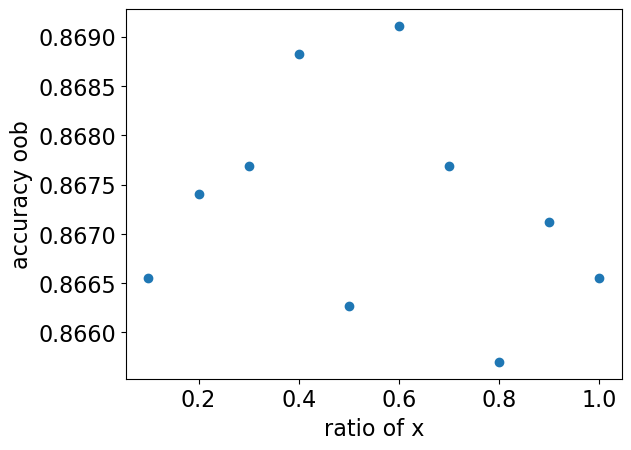

最適なx: 0.6


importance
Al / Si      0.109817
Na / Si      0.074887
F / Si       0.013016
H2O / Si     0.093442
sda1 / Si    0.109352
...               ...
MACCS_162    0.004039
MACCS_163    0.011690
MACCS_164    0.001936
MACCS_165    0.007778
MACCS_166    0.002208

[93 rows x 1 columns]

False  True
False   2752    26
True      35   709

False  True
False    866    61
True      85   163

正解率(Accuracy) : 訓練 0.9826802952867689, 検証 0.8757446808510638
適合率(Precision) : 訓練 0.964625850340136, 検証 0.7276785714285714
再現率(Recall) : 訓練 0.9529569892473119, 検証 0.657258064516129
F1スコア : 訓練 0.9587559161595672, 検証 0.690677966101695


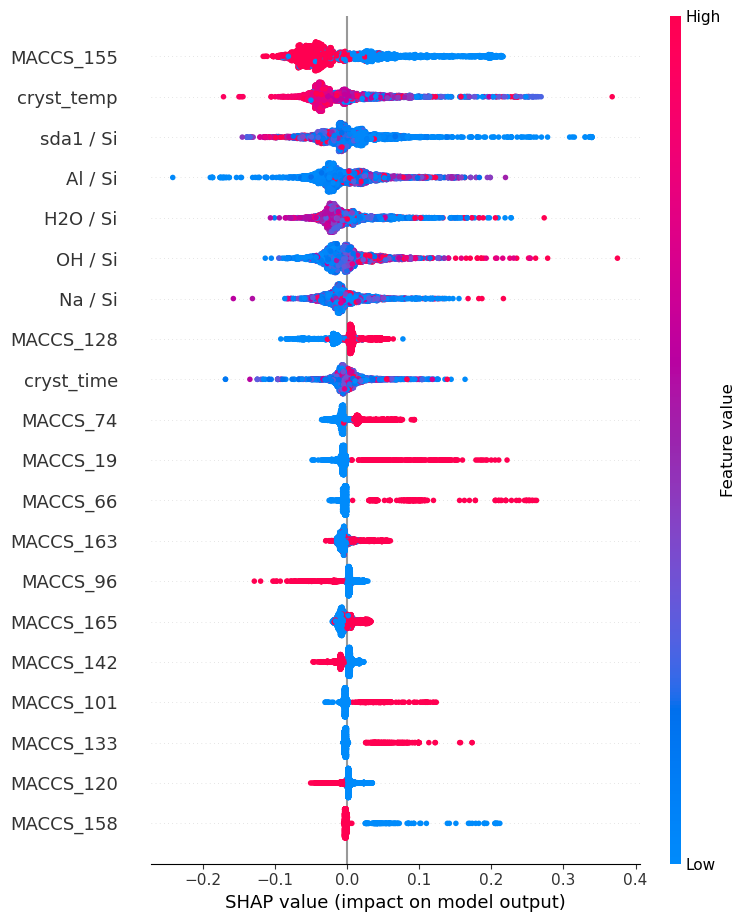

In [13]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 105].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# fer

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: fer, Length: 4697, dtype: object

fer
False    4455
True      242
Name: count, dtype: int64

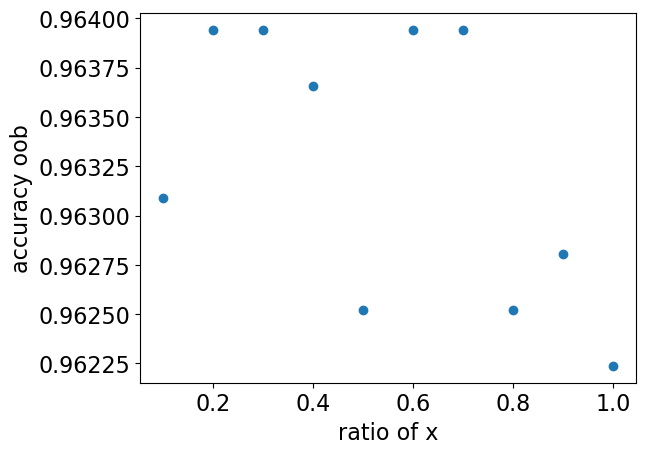

最適なx: 0.2


importance
Al / Si      0.126941
Na / Si      0.134710
F / Si       0.016514
H2O / Si     0.073912
sda1 / Si    0.117288
...               ...
MACCS_162    0.002250
MACCS_163    0.007885
MACCS_164    0.001601
MACCS_165    0.003627
MACCS_166    0.001743

[93 rows x 1 columns]

False  True
False   3337     4
True      21   160

False  True
False   1103    11
True      32    29

正解率(Accuracy) : 訓練 0.9929017603634299, 検証 0.963404255319149
適合率(Precision) : 訓練 0.975609756097561, 検証 0.725
再現率(Recall) : 訓練 0.8839779005524862, 検証 0.47540983606557374
F1スコア : 訓練 0.927536231884058, 検証 0.5742574257425742


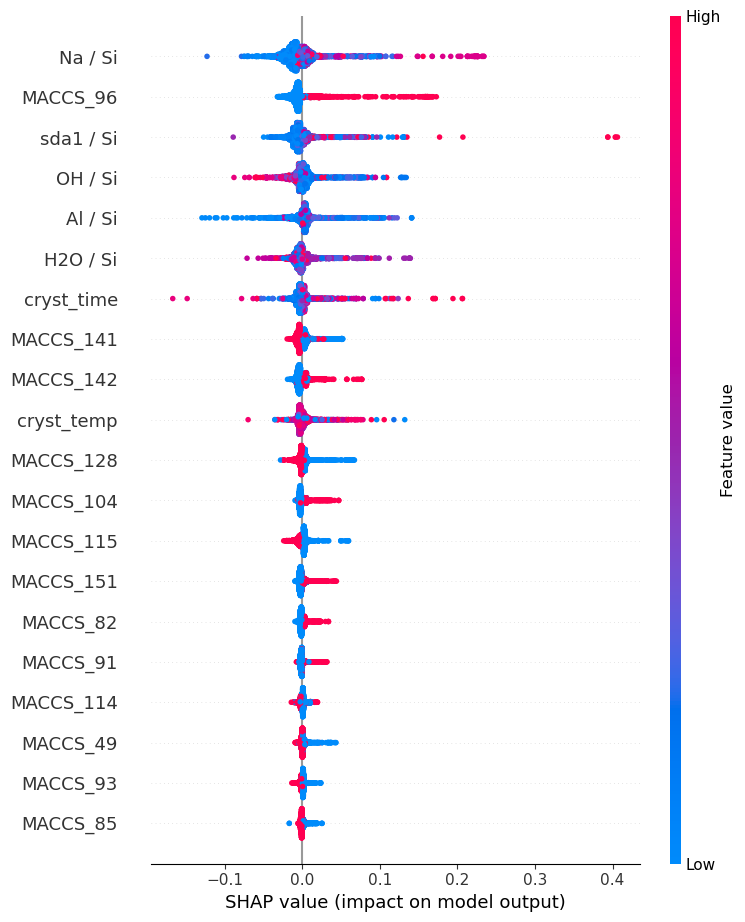

In [14]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 106].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mel

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: mel, Length: 4697, dtype: object

mel
False    3364
True     1333
Name: count, dtype: int64

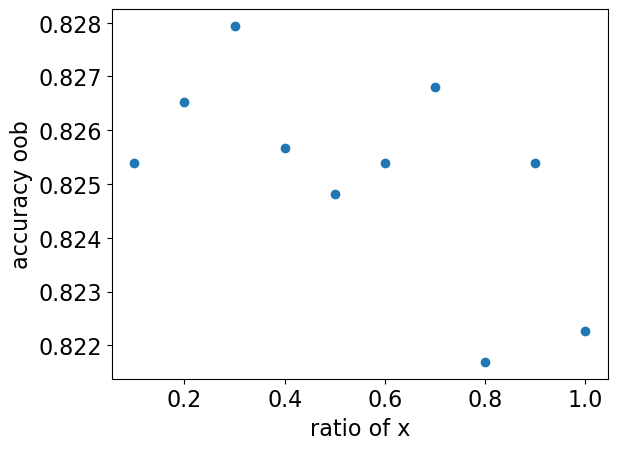

最適なx: 0.30000000000000004


importance
Al / Si      0.141488
Na / Si      0.088518
F / Si       0.011937
H2O / Si     0.071689
sda1 / Si    0.082943
...               ...
MACCS_162    0.002073
MACCS_163    0.004225
MACCS_164    0.002660
MACCS_165    0.008025
MACCS_166    0.000481

[93 rows x 1 columns]

False  True
False   2489    33
True      29   971

False  True
False    735   107
True     115   218

正解率(Accuracy) : 訓練 0.9823963657013061, 検証 0.811063829787234
適合率(Precision) : 訓練 0.9671314741035857, 検証 0.6707692307692308
再現率(Recall) : 訓練 0.971, 検証 0.6546546546546547
F1スコア : 訓練 0.969061876247505, 検証 0.662613981762918


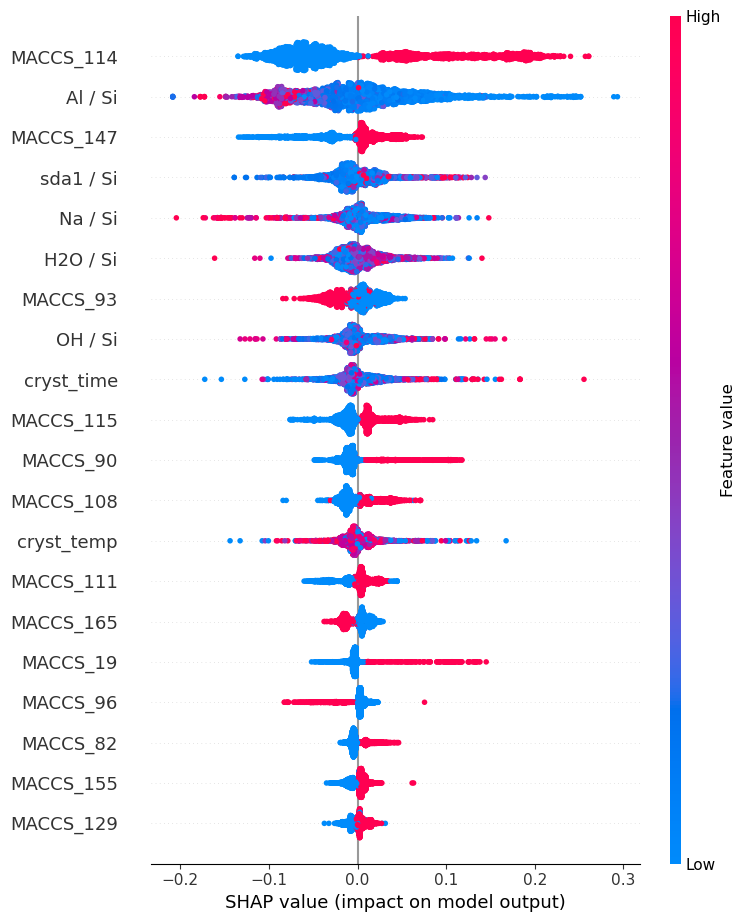

In [15]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 107].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mfi

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952    False
29977    False
29978    False
Name: mfi, Length: 4697, dtype: object

mfi
False    3502
True     1195
Name: count, dtype: int64

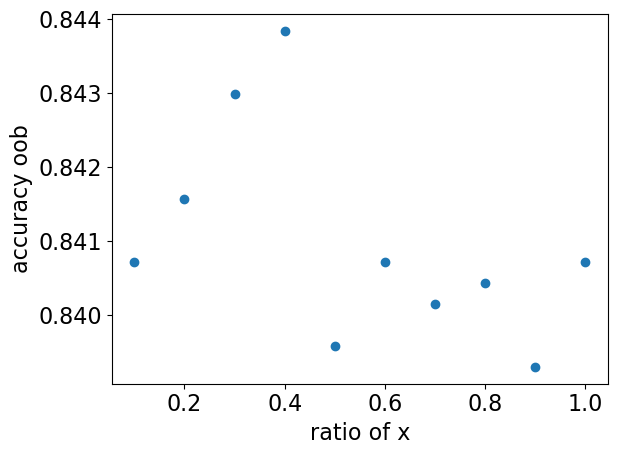

最適なx: 0.4


importance
Al / Si      0.155304
Na / Si      0.077426
F / Si       0.012115
H2O / Si     0.065649
sda1 / Si    0.075556
...               ...
MACCS_162    0.001734
MACCS_163    0.004077
MACCS_164    0.001191
MACCS_165    0.004243
MACCS_166    0.000371

[93 rows x 1 columns]

False  True
False   2597    29
True      25   871

False  True
False    786    90
True     104   195

正解率(Accuracy) : 訓練 0.9846678023850085, 検証 0.8348936170212766
適合率(Precision) : 訓練 0.9677777777777777, 検証 0.6842105263157895
再現率(Recall) : 訓練 0.9720982142857143, 検証 0.6521739130434783
F1スコア : 訓練 0.9699331848552338, 検証 0.6678082191780822


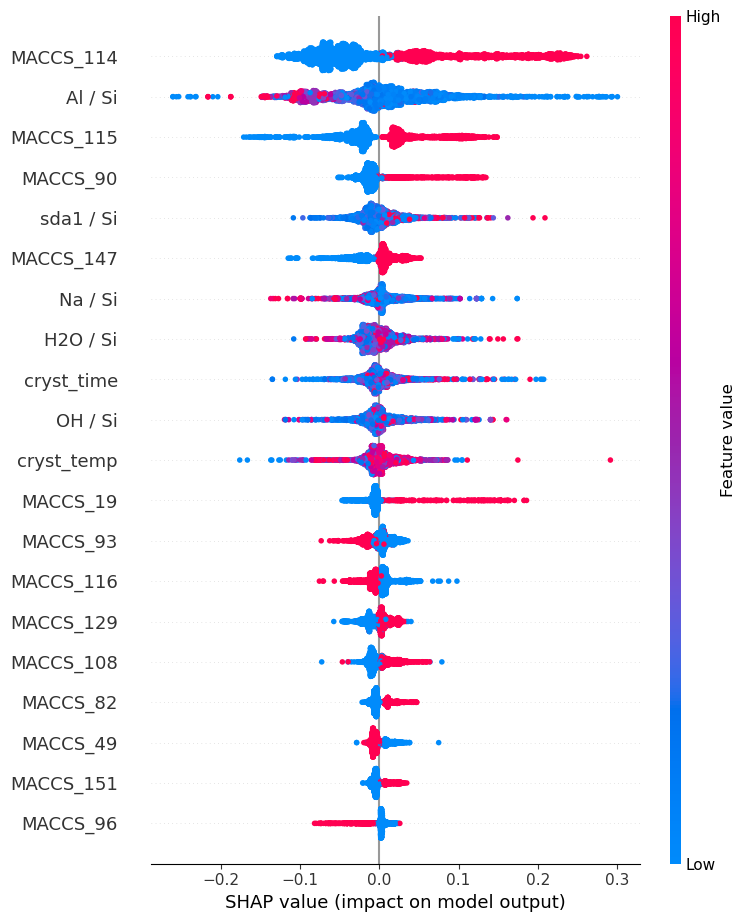

In [16]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 108].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtw

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952     True
29977     True
29978     True
Name: mtw, Length: 4697, dtype: object

mtw
False    4050
True      647
Name: count, dtype: int64

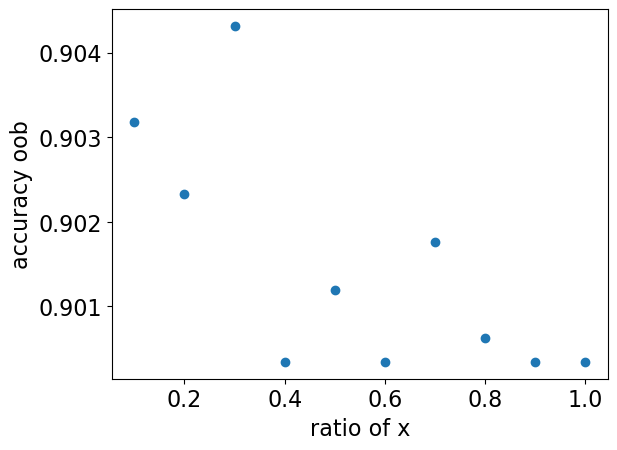

最適なx: 0.30000000000000004


importance
Al / Si      0.109672
Na / Si      0.082807
F / Si       0.013230
H2O / Si     0.127331
sda1 / Si    0.085554
...               ...
MACCS_162    0.010288
MACCS_163    0.006004
MACCS_164    0.000736
MACCS_165    0.002808
MACCS_166    0.000525

[93 rows x 1 columns]

False  True
False   3031     6
True      22   463

False  True
False    974    39
True      79    83

正解率(Accuracy) : 訓練 0.9920499716070414, 検証 0.8995744680851064
適合率(Precision) : 訓練 0.9872068230277186, 検証 0.680327868852459
再現率(Recall) : 訓練 0.954639175257732, 検証 0.5123456790123457
F1スコア : 訓練 0.9706498951781971, 検証 0.5845070422535211


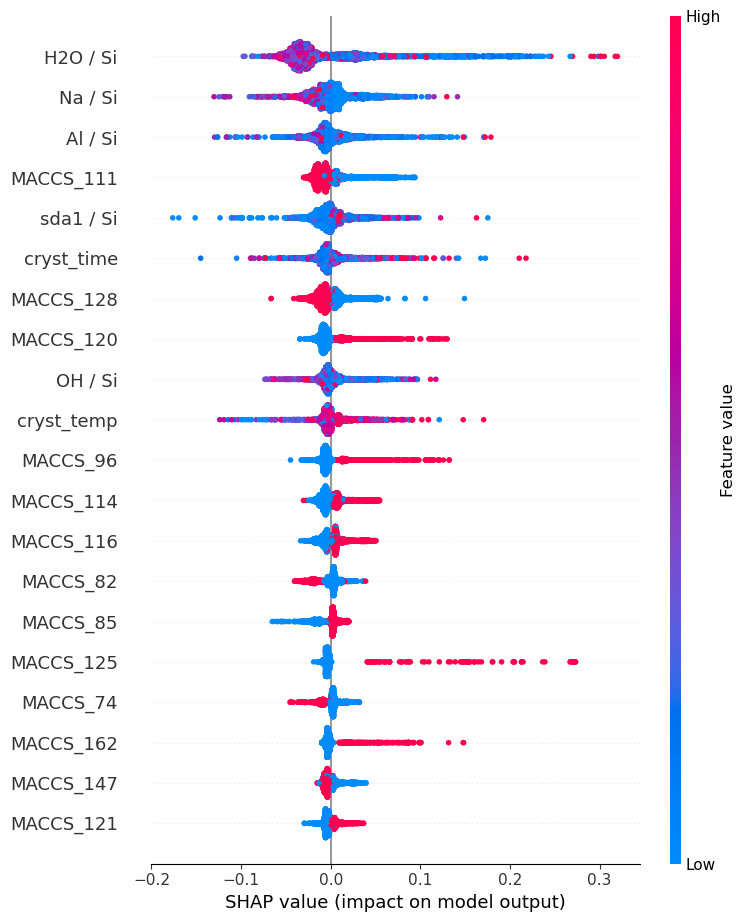

In [17]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 109].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# ton

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: ton, Length: 4697, dtype: object

ton
False    4306
True      391
Name: count, dtype: int64

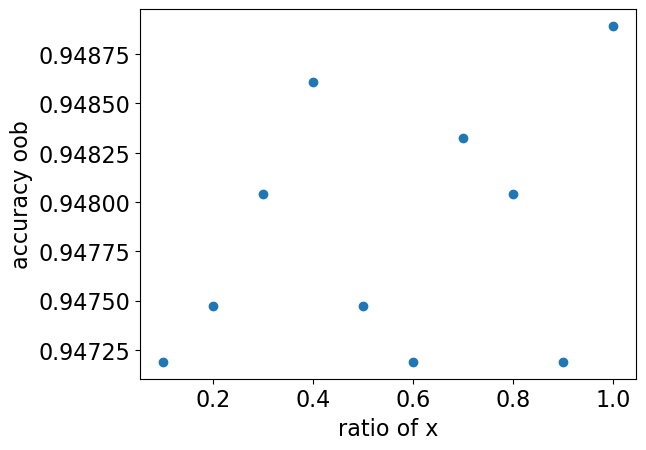

最適なx: 1.0


importance
Al / Si      0.146469
Na / Si      0.063890
F / Si       0.003934
H2O / Si     0.096391
sda1 / Si    0.074265
...               ...
MACCS_162    0.001314
MACCS_163    0.002389
MACCS_164    0.001632
MACCS_165    0.027791
MACCS_166    0.001594

[93 rows x 1 columns]

False  True
False   3225     4
True      21   272

False  True
False   1042    35
True      33    65

正解率(Accuracy) : 訓練 0.9929017603634299, 検証 0.9421276595744681
適合率(Precision) : 訓練 0.9855072463768116, 検証 0.65
再現率(Recall) : 訓練 0.9283276450511946, 検証 0.6632653061224489
F1スコア : 訓練 0.9560632688927944, 検証 0.6565656565656566


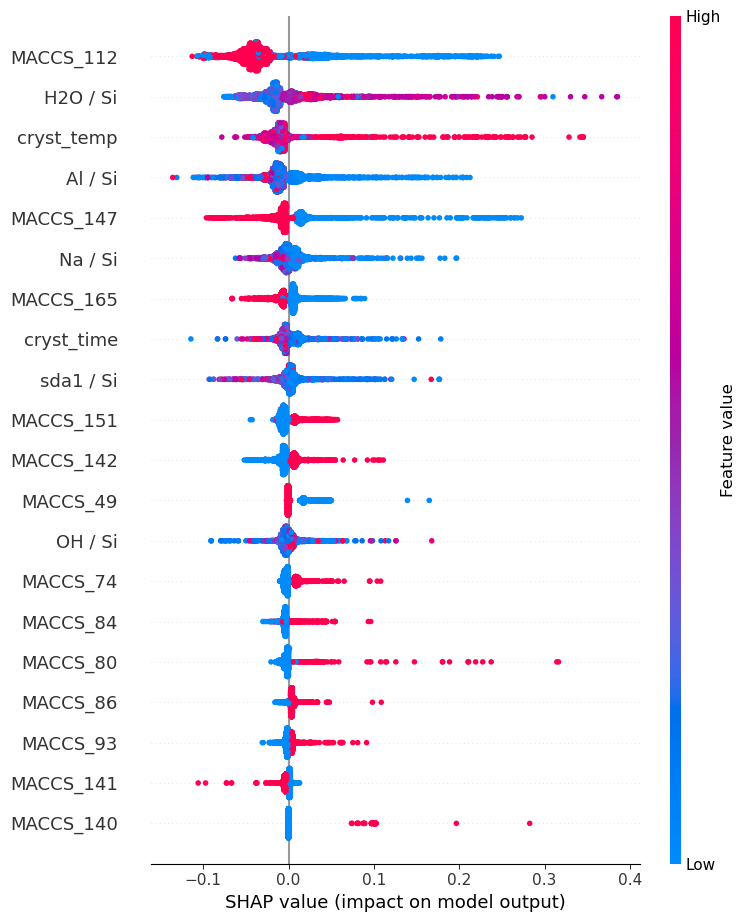

In [18]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 110].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# non

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: non, Length: 4697, dtype: object

non
False    4579
True      118
Name: count, dtype: int64

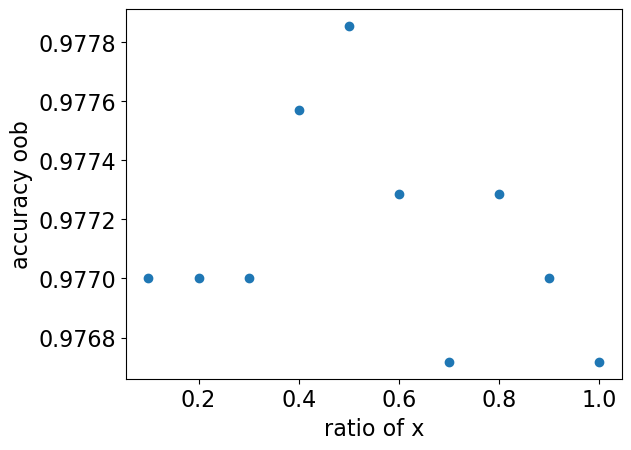

最適なx: 0.5


importance
Al / Si      0.139486
Na / Si      0.078382
F / Si       0.029057
H2O / Si     0.061845
sda1 / Si    0.063944
...               ...
MACCS_162    0.001416
MACCS_163    0.004150
MACCS_164    0.001335
MACCS_165    0.005501
MACCS_166    0.095581

[93 rows x 1 columns]

False  True
False   3432     2
True       9    79

False  True
False   1135    10
True      16    14

正解率(Accuracy) : 訓練 0.9968767745599092, 検証 0.977872340425532
適合率(Precision) : 訓練 0.9753086419753086, 検証 0.5833333333333334
再現率(Recall) : 訓練 0.8977272727272727, 検証 0.4666666666666667
F1スコア : 訓練 0.9349112426035503, 検証 0.5185185185185185


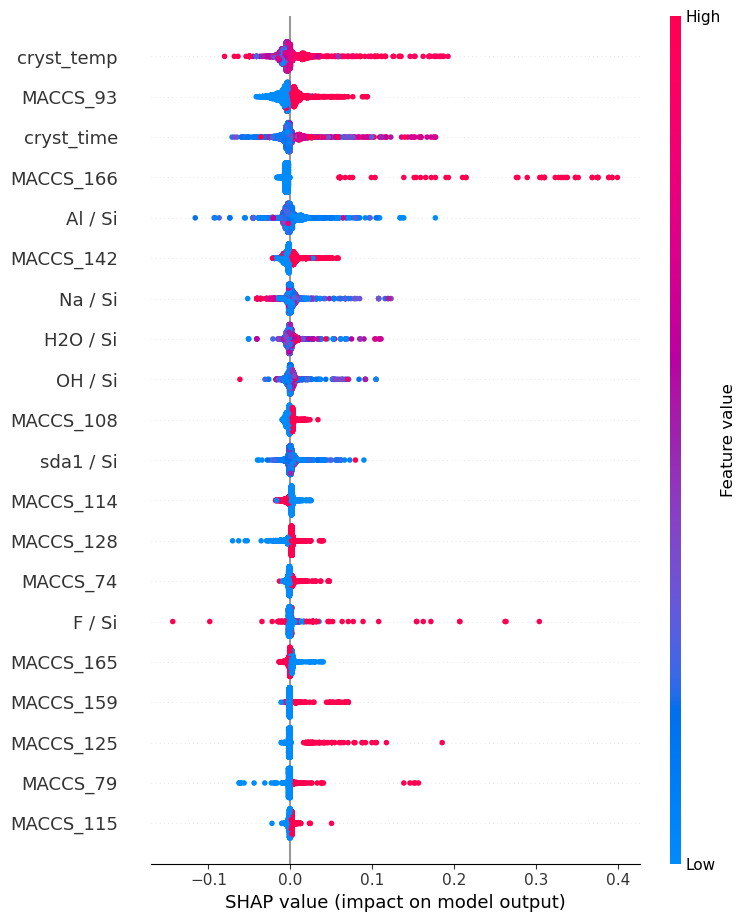

In [19]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 111].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d8r

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d8r, Length: 4697, dtype: object

d8r
False    4671
True       26
Name: count, dtype: int64

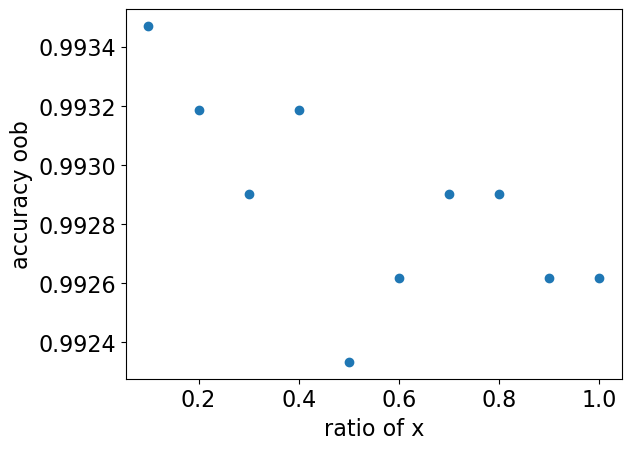

最適なx: 0.1


importance
Al / Si      0.067389
Na / Si      0.097819
F / Si       0.039884
H2O / Si     0.111268
sda1 / Si    0.179803
...               ...
MACCS_162    0.000848
MACCS_163    0.003161
MACCS_164    0.003062
MACCS_165    0.002330
MACCS_166    0.000139

[93 rows x 1 columns]

False  True
False   3503     0
True       4    15

False  True
False   1167     1
True       6     1

正解率(Accuracy) : 訓練 0.9988642816581488, 検証 0.9940425531914894
適合率(Precision) : 訓練 1.0, 検証 0.5
再現率(Recall) : 訓練 0.7894736842105263, 検証 0.14285714285714285
F1スコア : 訓練 0.8823529411764706, 検証 0.2222222222222222


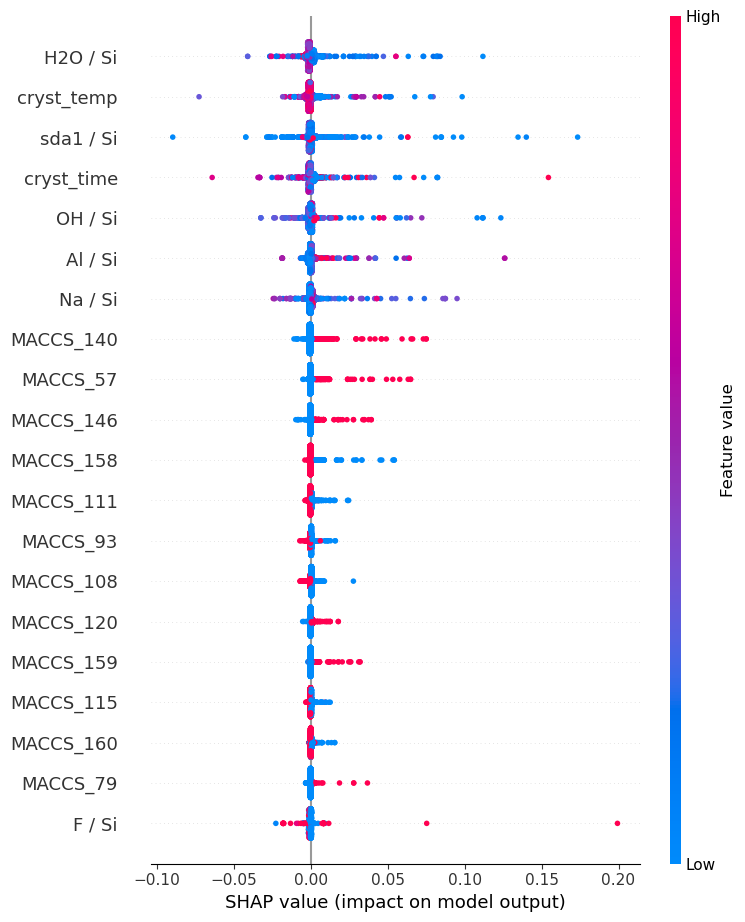

In [20]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 112].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# can

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: can, Length: 4697, dtype: object

can
False    4543
True      154
Name: count, dtype: int64

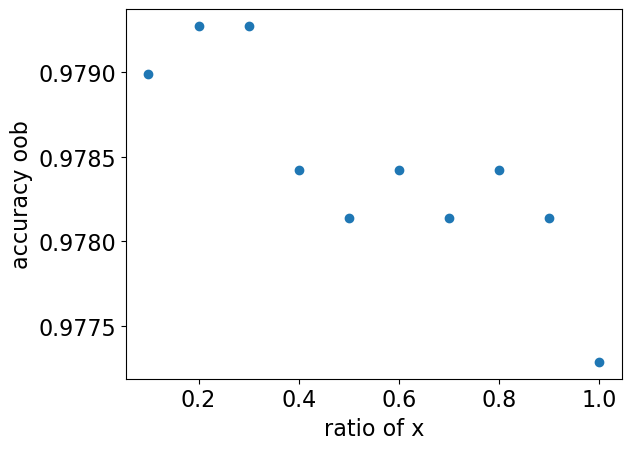

最適なx: 0.2


importance
Al / Si      0.096343
Na / Si      0.118173
F / Si       0.002823
H2O / Si     0.099641
sda1 / Si    0.156894
...               ...
MACCS_162    0.002745
MACCS_163    0.008130
MACCS_164    0.004241
MACCS_165    0.005750
MACCS_166    0.016317

[93 rows x 1 columns]

False  True
False   3407     0
True      13   102

False  True
False   1126    10
True      19    20

正解率(Accuracy) : 訓練 0.9963089153889836, 検証 0.9753191489361702
適合率(Precision) : 訓練 1.0, 検証 0.6666666666666666
再現率(Recall) : 訓練 0.8869565217391304, 検証 0.5128205128205128
F1スコア : 訓練 0.9400921658986175, 検証 0.5797101449275363


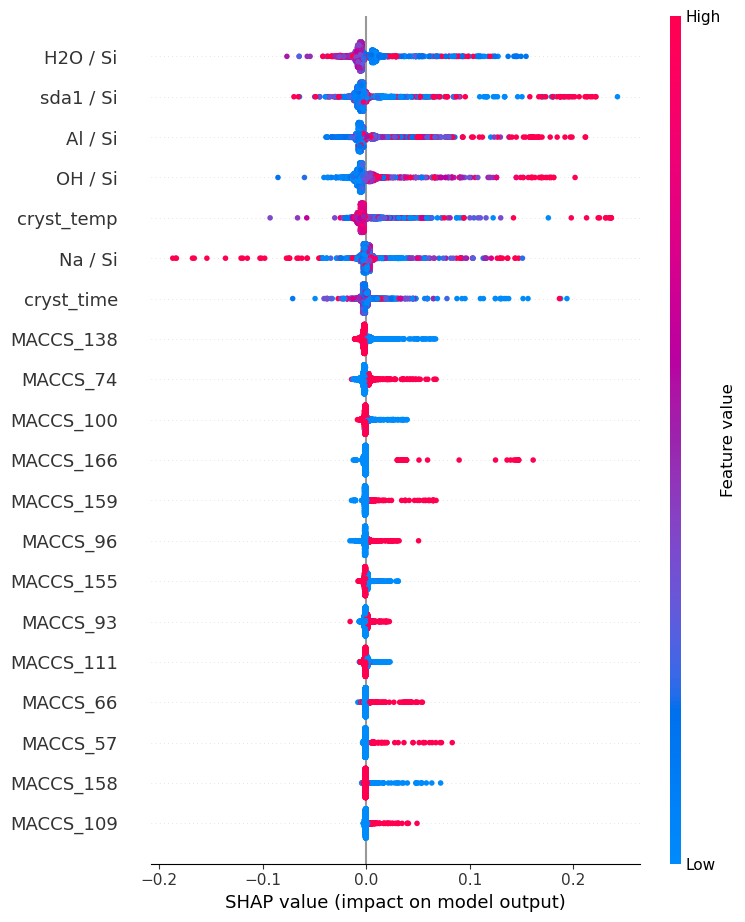

In [21]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 113].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# phi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: phi, Length: 4697, dtype: object

phi
False    4581
True      116
Name: count, dtype: int64

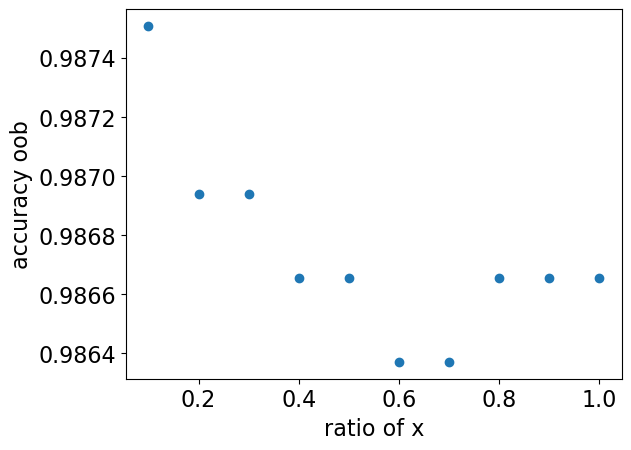

最適なx: 0.1


importance
Al / Si      0.104891
Na / Si      0.119310
F / Si       0.040182
H2O / Si     0.049702
sda1 / Si    0.078184
...               ...
MACCS_162    0.000435
MACCS_163    0.003964
MACCS_164    0.017383
MACCS_165    0.002329
MACCS_166    0.000616

[93 rows x 1 columns]

False  True
False   3431     4
True       3    84

False  True
False   1135    11
True       5    24

正解率(Accuracy) : 訓練 0.9980124929017604, 検証 0.9863829787234043
適合率(Precision) : 訓練 0.9545454545454546, 検証 0.6857142857142857
再現率(Recall) : 訓練 0.9655172413793104, 検証 0.8275862068965517
F1スコア : 訓練 0.96, 検証 0.75


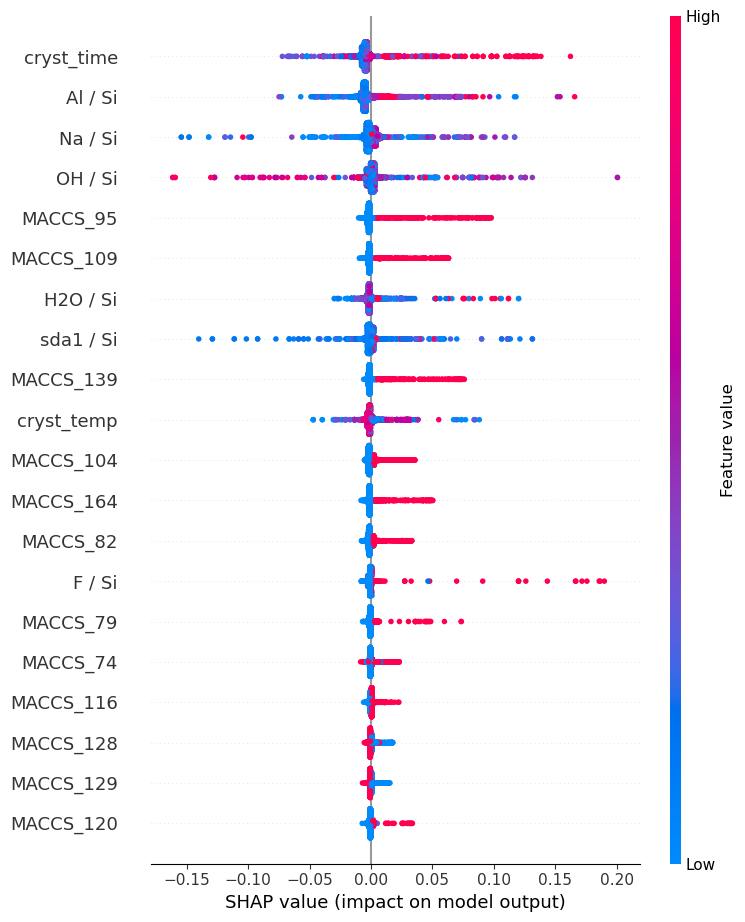

In [22]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 114].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# sod

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: sod, Length: 4697, dtype: object

sod
False    4395
True      302
Name: count, dtype: int64

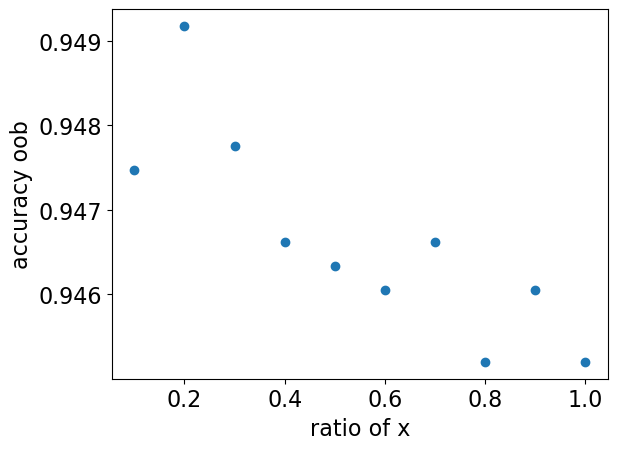

最適なx: 0.2


importance
Al / Si      0.135097
Na / Si      0.115341
F / Si       0.007356
H2O / Si     0.103123
sda1 / Si    0.100385
...               ...
MACCS_162    0.001190
MACCS_163    0.003104
MACCS_164    0.001583
MACCS_165    0.002866
MACCS_166    0.000006

[93 rows x 1 columns]

False  True
False   3288     8
True      16   210

False  True
False   1070    29
True      41    35

正解率(Accuracy) : 訓練 0.9931856899488927, 検証 0.9404255319148936
適合率(Precision) : 訓練 0.963302752293578, 検証 0.546875
再現率(Recall) : 訓練 0.9292035398230089, 検証 0.4605263157894737
F1スコア : 訓練 0.9459459459459459, 検証 0.5


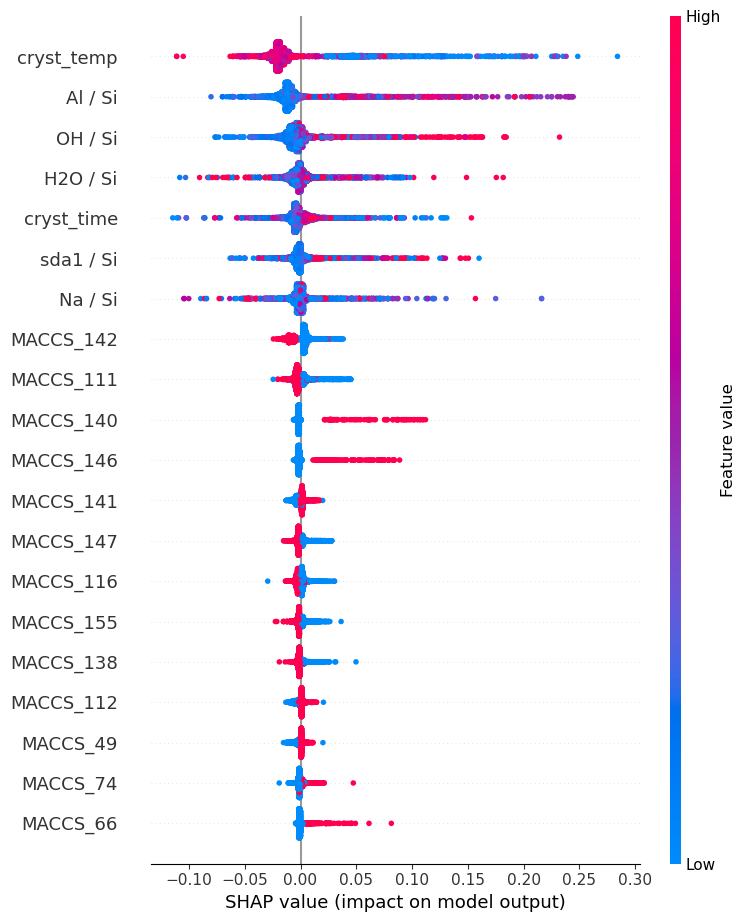

In [23]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 115].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# gme

249      False
250       True
251      False
252      False
253       True
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: gme, Length: 4697, dtype: object

gme
False    4529
True      168
Name: count, dtype: int64

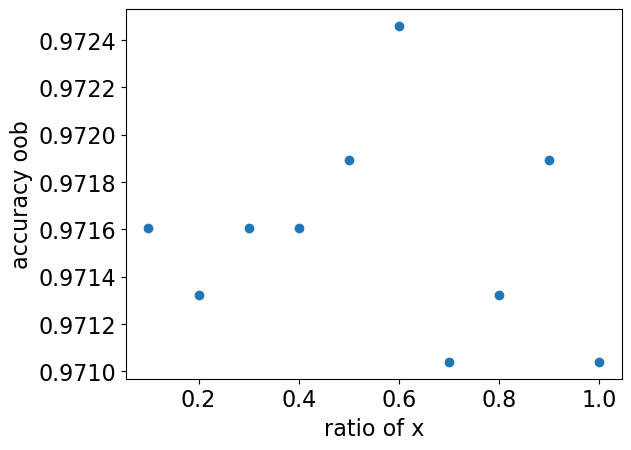

最適なx: 0.6


importance
Al / Si      0.118215
Na / Si      0.134931
F / Si       0.000731
H2O / Si     0.114423
sda1 / Si    0.108639
...               ...
MACCS_162    0.009104
MACCS_163    0.004536
MACCS_164    0.001228
MACCS_165    0.002624
MACCS_166    0.000180

[93 rows x 1 columns]

False  True
False   3394     2
True      18   108

False  True
False   1123    10
True      18    24

正解率(Accuracy) : 訓練 0.9943214082907439, 検証 0.9761702127659575
適合率(Precision) : 訓練 0.9818181818181818, 検証 0.7058823529411765
再現率(Recall) : 訓練 0.8571428571428571, 検証 0.5714285714285714
F1スコア : 訓練 0.9152542372881356, 検証 0.631578947368421


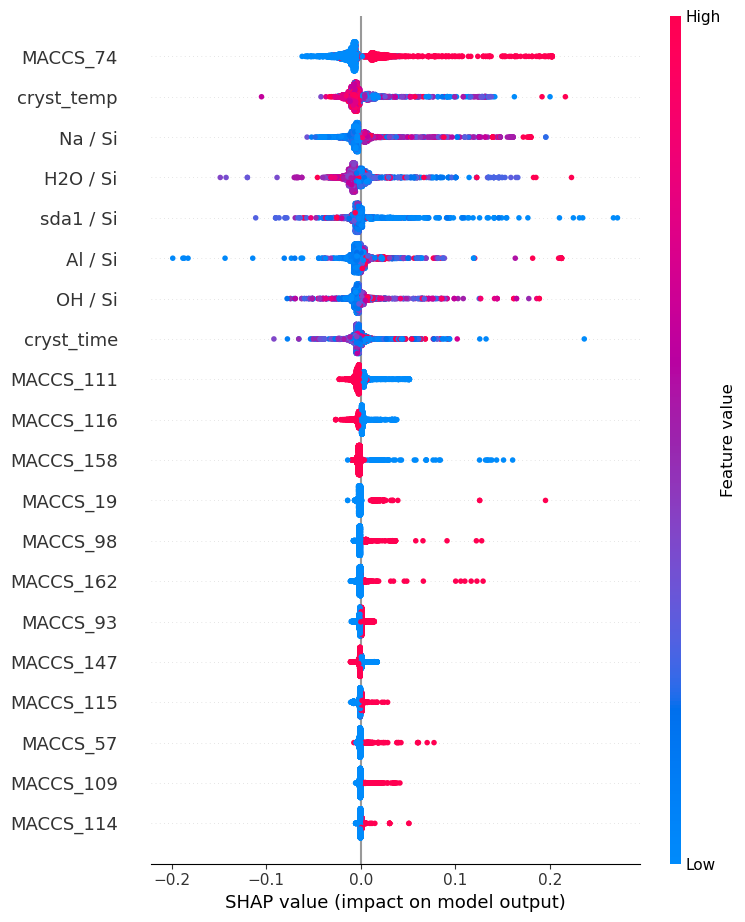

In [24]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 116].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# pau

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: pau, Length: 4697, dtype: object

pau
False    4671
True       26
Name: count, dtype: int64

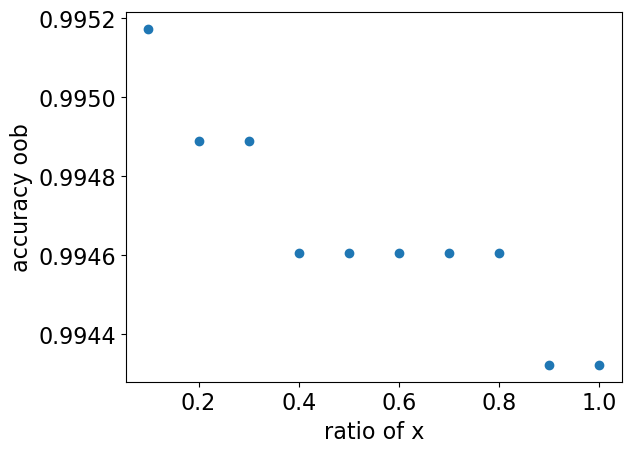

最適なx: 0.1


importance
Al / Si      0.114182
Na / Si      0.070726
F / Si       0.016463
H2O / Si     0.150240
sda1 / Si    0.138469
...               ...
MACCS_162    0.003394
MACCS_163    0.003544
MACCS_164    0.001197
MACCS_165    0.002575
MACCS_166    0.000000

[93 rows x 1 columns]

False  True
False   3501     2
True       2    17

False  True
False   1164     4
True       6     1

正解率(Accuracy) : 訓練 0.9988642816581488, 検証 0.9914893617021276
適合率(Precision) : 訓練 0.8947368421052632, 検証 0.2
再現率(Recall) : 訓練 0.8947368421052632, 検証 0.14285714285714285
F1スコア : 訓練 0.8947368421052632, 検証 0.16666666666666666


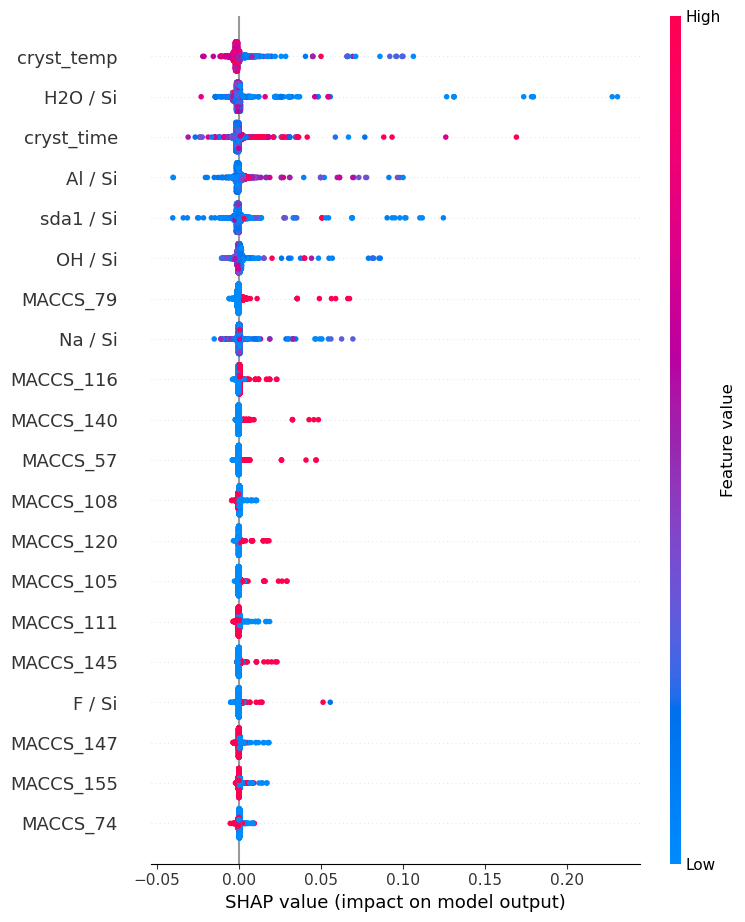

In [25]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 117].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# lta

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: lta, Length: 4697, dtype: object

lta
False    4577
True      120
Name: count, dtype: int64

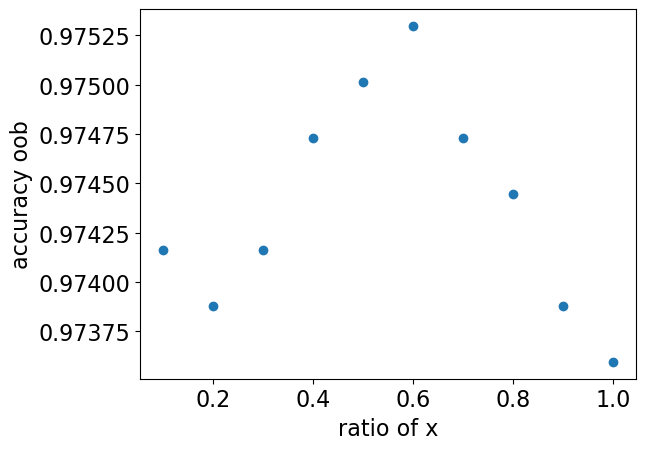

最適なx: 0.6


importance
Al / Si      0.132693
Na / Si      0.105687
F / Si       0.016586
H2O / Si     0.138222
sda1 / Si    0.112293
...               ...
MACCS_162    0.000663
MACCS_163    0.002322
MACCS_164    0.000441
MACCS_165    0.001713
MACCS_166    0.000006

[93 rows x 1 columns]

False  True
False   3428     4
True       5    85

False  True
False   1130    15
True      25     5

正解率(Accuracy) : 訓練 0.9974446337308348, 検証 0.9659574468085106
適合率(Precision) : 訓練 0.9550561797752809, 検証 0.25
再現率(Recall) : 訓練 0.9444444444444444, 検証 0.16666666666666666
F1スコア : 訓練 0.9497206703910615, 検証 0.2


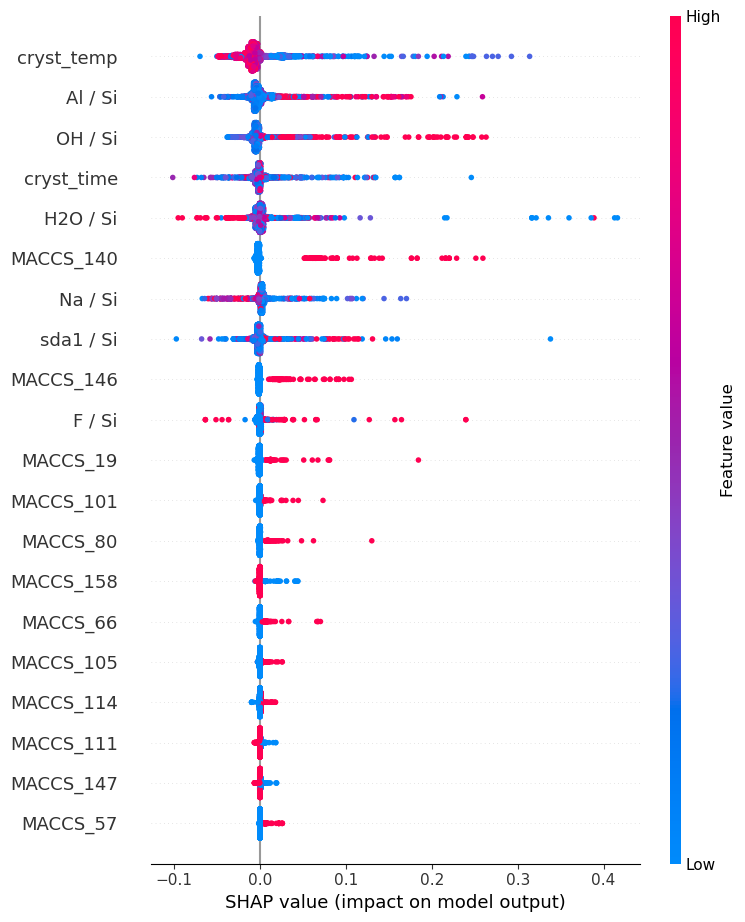

In [26]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 118].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# jbw

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: jbw, Length: 4697, dtype: object

jbw
False    4148
True      549
Name: count, dtype: int64

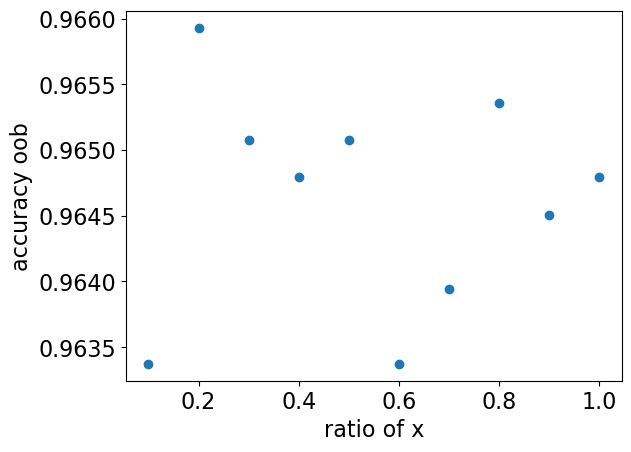

最適なx: 0.2


importance
Al / Si      0.138939
Na / Si      0.078619
F / Si       0.005734
H2O / Si     0.084969
sda1 / Si    0.066645
...               ...
MACCS_162    0.002713
MACCS_163    0.004769
MACCS_164    0.001826
MACCS_165    0.010785
MACCS_166    0.000376

[93 rows x 1 columns]

False  True
False   3105     5
True       6   406

False  True
False   1021    17
True      27   110

正解率(Accuracy) : 訓練 0.9968767745599092, 検証 0.9625531914893617
適合率(Precision) : 訓練 0.9878345498783455, 検証 0.8661417322834646
再現率(Recall) : 訓練 0.9854368932038835, 検証 0.8029197080291971
F1スコア : 訓練 0.9866342648845686, 検証 0.8333333333333334


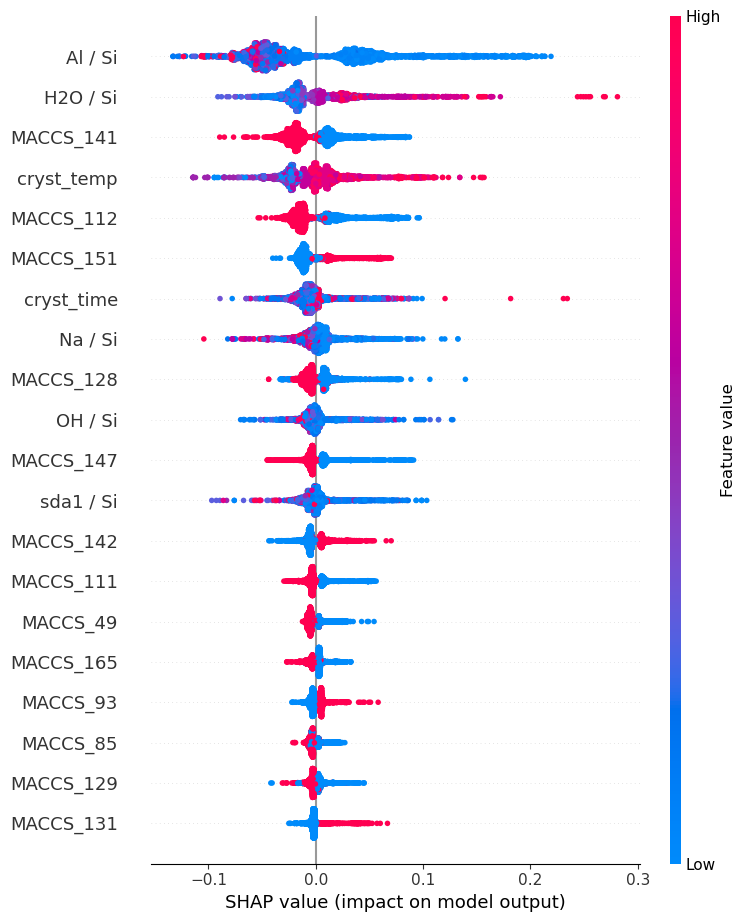

In [1]:
import pandas as pd
dataset=pd.read_csv('dataset_maccs_CBU_jbw.csv', index_col=0, header=0)
x=dataset.iloc[:, :93]
y=dataset.iloc[:, 119].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)